In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importación de datos



In [29]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1["Tienda"] = "Tienda 1"
tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "Tienda 2"
tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "Tienda 3"
tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "Tienda 4"
alura_store = pd.concat([tienda1, tienda2, tienda3, tienda4])
alura_store.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


# 1. Análisis de facturación (Ingresos)

In [3]:
alura_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.0+ MB


In [4]:
facturacion_tienda1 = format(tienda1["Precio"].sum(), ",.0f").replace(",", ".")
facturacion_tienda2 = format(tienda2["Precio"].sum(), ",.0f").replace(",", ".")
facturacion_tienda3 = format(tienda3["Precio"].sum(), ",.0f").replace(",", ".")
facturacion_tienda4 = format(tienda4["Precio"].sum(), ",.0f").replace(",", ".")

In [5]:
df = pd.DataFrame({"Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
                   "Facturación Total": [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]})
df.head()

,Tienda,Facturación Total
0,Tienda 1,1.150.880.400
1,Tienda 2,1.116.343.500
2,Tienda 3,1.098.019.600
3,Tienda 4,1.038.375.700


#### Visualización

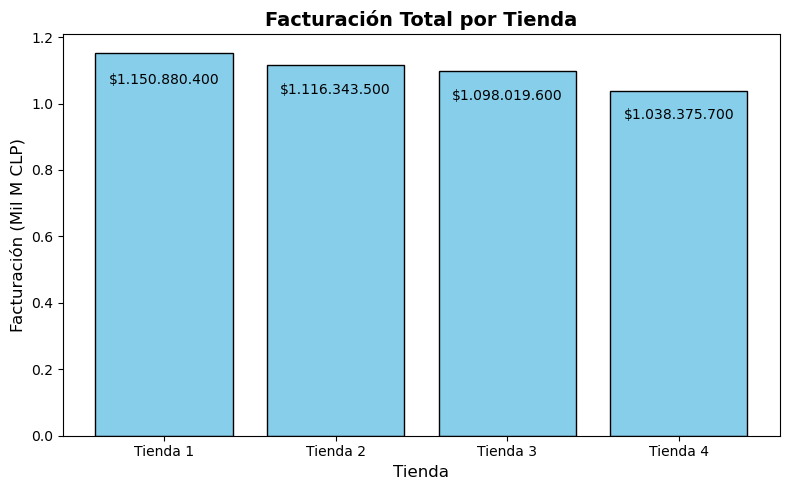

In [6]:
# Formatear a valores numéricos
df["Facturación Total"] = df["Facturación Total"].str.replace(".", "", regex=False).astype(float)

# Escalar valores a miles de millones para el eje Y
df["Facturación (Mil M)"] = df["Facturación Total"] / 1e9

plt.figure(figsize=(8, 5))
barras = plt.bar(df["Tienda"], df["Facturación (Mil M)"], color="skyblue", edgecolor="black")

plt.title("Facturación Total por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Facturación (Mil M CLP)", fontsize=12)

# Desactivar notación científica
plt.ticklabel_format(axis='y', style='plain')

# Mostrar valores dentro de cada barra
for i, barra in enumerate(barras):
    valor_real = df.loc[i, "Facturación Total"]
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,    # centrado horizontal
        altura * 0.95,                            # ligeramente debajo del borde superior
        f"${valor_real:,.0f}".replace(",", "."),  # formato chileno
        ha="center", va="top", color="black", fontsize=10
    )
plt.tight_layout()
plt.show()

# 2. Ventas por categoría
#### Top 5 de ventas por categoría de todas las tiendas

In [63]:
top5_ventas_por_categoria_general = (
    alura_store["Categoría del Producto"]
    .value_counts()
    .head()
    .reset_index()
    .rename(columns={"count": "Ventas"})
)
top5_ventas_por_categoria_general

,Categoría del Producto,Ventas
0,Muebles,1886
1,Electrónicos,1772
2,Juguetes,1290
3,Electrodomésticos,1149
4,Deportes y diversión,1113


#### Top 5 de ventas por categoría de cada tienda

In [8]:
# Agrupar por tienda y categoría, contar las ventas
top5_ventas_por_categoria_por_tienda = (
    alura_store.groupby(["Tienda", "Categoría del Producto"])
    .size()
    .reset_index(name="Ventas")
)

# Ordenar de mayor a menor por tienda y ventas
top5_ventas_por_categoria_por_tienda = top5_ventas_por_categoria_por_tienda.sort_values(
    ["Tienda", "Ventas"], ascending=[True, False]
)

# Tomar las 5 mejores categorías por cada tienda
top5_ventas_por_categoria_por_tienda = (
    top5_ventas_por_categoria_por_tienda.groupby("Tienda")
    .head(5)
    .reset_index(drop=True)
)

top5_ventas_por_categoria_por_tienda

,Tienda,Categoría del Producto,Ventas
0,Tienda 1,Muebles,465
1,Tienda 1,Electrónicos,448
2,Tienda 1,Juguetes,324
3,Tienda 1,Electrodomésticos,312
4,Tienda 1,Deportes y diversión,284
5,Tienda 2,Muebles,442
6,Tienda 2,Electrónicos,422
7,Tienda 2,Juguetes,313
8,Tienda 2,Electrodomésticos,305
9,Tienda 2,Deportes y diversión,275


#### Top 1 de ventas por categoría de cada tienda

In [9]:
top1_ventas_por_categoria_cada_tienda = (
    top5_ventas_por_categoria_por_tienda.loc[top5_ventas_por_categoria_por_tienda.groupby("Tienda")["Ventas"].idxmax()]
    .reset_index(drop=True)
)
top1_ventas_por_categoria_cada_tienda

,Tienda,Categoría del Producto,Ventas
0,Tienda 1,Muebles,465
1,Tienda 2,Muebles,442
2,Tienda 3,Muebles,499
3,Tienda 4,Muebles,480


## Visualizaciones

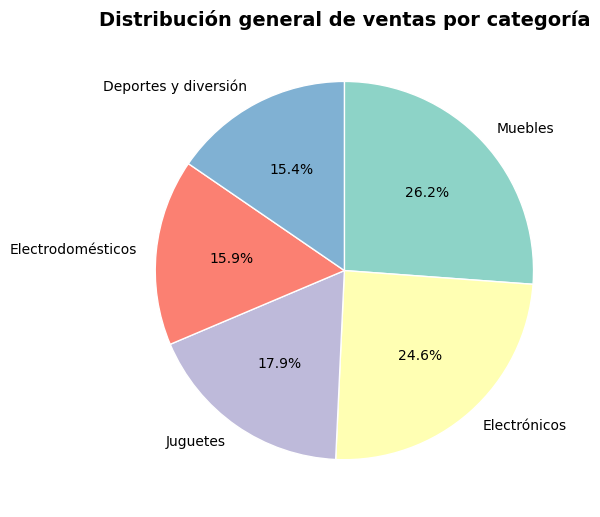

In [64]:
import matplotlib.pyplot as plt

# Base: top 5 categorías generales (usa tu DataFrame top5_ventas_por_categoria_general)
plt.figure(figsize=(6, 6))
plt.pie(
    top5_ventas_por_categoria_general["Ventas"],
    labels=top5_ventas_por_categoria_general["Categoría del Producto"],
    autopct="%1.1f%%",       # porcentaje con un decimal
    startangle=90,           # empieza desde arriba
    counterclock=False,      # sentido horario
    wedgeprops={"edgecolor": "white"},  # bordes blancos para contraste
    colors=plt.cm.Set3.colors  # paleta de colores bonita
)
plt.title("Distribución general de ventas por categoría", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


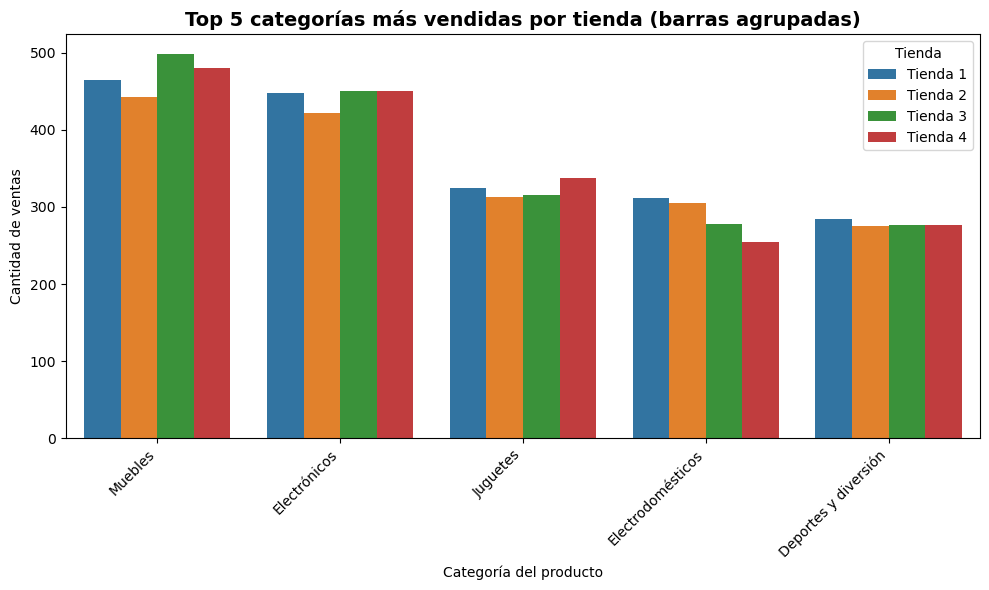

In [65]:
bplt.figure(figsize=(10, 6))
sns.barplot(
    data=top5_ventas_por_categoria_por_tienda,
    x="Categoría del Producto",
    y="Ventas",
    hue="Tienda"
)
plt.title("Top 5 categorías más vendidas por tienda", fontsize=14, fontweight="bold")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


#### General

In [10]:
calificacion_promedio_general = alura_store["Calificación"].mean()
print(f"Calificación promedio general: {calificacion_promedio_general:.2f}")

Calificación promedio general: 4.01


#### Por Tienda

In [11]:
calificacion_promedio_por_tienda = (
    alura_store.groupby("Tienda")
    .agg(
        Calificación_Promedio=("Calificación", "mean"),
        Cantidad_Reseñas=("Calificación", "count")
    )
    .reset_index()
)
calificacion_promedio_por_tienda

,Tienda,Calificación_Promedio,Cantidad_Reseñas
0,Tienda 1,3.976685,2359
1,Tienda 2,4.037304,2359
2,Tienda 3,4.048326,2359
3,Tienda 4,3.995759,2358


#### Visualización

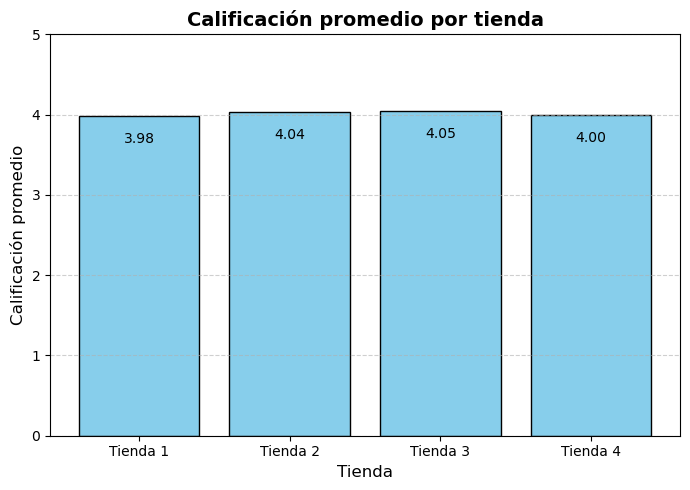

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))

barras = ax.bar(
    calificacion_promedio_por_tienda["Tienda"],
    calificacion_promedio_por_tienda["Calificación_Promedio"],
    color="skyblue",
    edgecolor="black"
)

ax.set_title("Calificación promedio por tienda", fontsize=14, fontweight="bold")
ax.set_xlabel("Tienda", fontsize=12)
ax.set_ylabel("Calificación promedio", fontsize=12)
ax.set_ylim(0, 5)
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Etiquetas dentro, pegadas al borde superior de cada barra
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        altura * 0.95,          # un pelín debajo del tope
        f"{altura:.2f}",
        ha="center", va="top", fontsize=10, color="black"
    )

fig.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [37]:
alura_store["Producto"].value_counts().head()

Producto
Mesa de noche                210
Microondas                   206
Carrito de control remoto    206
Batería                      203
Cama king                    201
Name: count, dtype: int64

In [46]:
top5_productos_por_tienda = (
    productos_por_tienda.groupby("Tienda")
    .head(5)
    .reset_index(drop=True)
)

top5_productos_por_tienda.sort_values(["Tienda", "Ventas"], ascending=[True, False])

,Tienda,Producto,Ventas
1,Tienda 1,Armario,60
3,Tienda 1,Auriculares,50
0,Tienda 1,Ajedrez de madera,49
2,Tienda 1,Asistente virtual,40
4,Tienda 1,Auriculares con micrófono,33
6,Tienda 2,Armario,54
5,Tienda 2,Ajedrez de madera,45
9,Tienda 2,Auriculares con micrófono,44
7,Tienda 2,Asistente virtual,38
8,Tienda 2,Auriculares,37


# 5. Envío promedio por tienda

In [61]:
print(f"Costos de Envío Promedio General: {alura_store["Costo de envío"].mean().round(1)}")

Costos de Envío Promedio General: 24875.1


In [60]:
envio_promedio_envio_tienda = (
    alura_store.groupby("Tienda")
    .agg(
        costos_de_envios_promedio=("Costo de envío", "mean")
    )
    .reset_index()
)
envio_promedio_envio_tienda["costos_de_envios_promedio"] = envio_promedio_envio_tienda["costos_de_envios_promedio"].round(1)
envio_promedio_envio_tienda

,Tienda,costos_de_envios_promedio
0,Tienda 1,26018.6
1,Tienda 2,25216.2
2,Tienda 3,24805.7
3,Tienda 4,23459.5


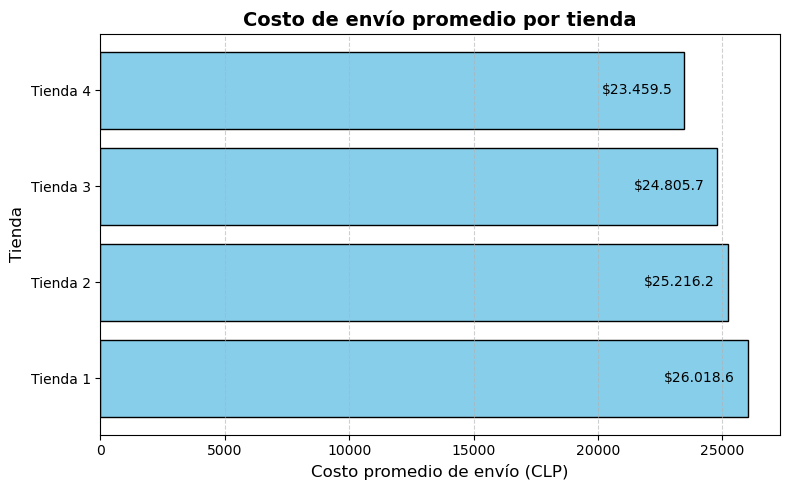

In [68]:
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(8, 5))

# Dibujar barras horizontales
barras = plt.barh(
    envio_promedio_envio_tienda["Tienda"],
    envio_promedio_envio_tienda["costos_de_envios_promedio"],
    color="skyblue",
    edgecolor="black"
)

# Título y etiquetas
plt.title("Costo de envío promedio por tienda", fontsize=14, fontweight="bold")
plt.xlabel("Costo promedio de envío (CLP)", fontsize=12)
plt.ylabel("Tienda", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Mostrar valores dentro de las barras
for barra in barras:
    ancho = barra.get_width()
    plt.text(
        ancho - (ancho * 0.02),  # un poquito antes del borde derecho
        barra.get_y() + barra.get_height() / 2,
        f"${ancho:,.1f}".replace(",", "."),
        ha="right", va="center",
        color="black", fontsize=10
    )

plt.tight_layout()
plt.show()
